In [21]:
import pandas as pd
import random
from iller import iller

years = list(range(2016, 2026))

veri_listesi = []

for il in iller:
    sehir = il["KONUM"][0]
    for yil in years:
        for i in range(12):  
            alt = il["ALT_SICAKLIK"][i] + round(random.uniform(-5, 5), 1)
            ust = il["UST_SICAKLIK"][i] + round(random.uniform(-5, 5), 1)
            veri_listesi.append({
                "YIL": yil,
                "IL": sehir,
                "AY": il["AY"][i],
                "ALT_SICAKLIK": alt,
                "UST_SICAKLIK": ust
            })


df = pd.DataFrame(veri_listesi)


df.to_excel("iller_sicaklik_2016_2025_random.xlsx", index=False)

print("Excel dosyası oluşturuldu: iller_sicaklik_2016_2025_random.xlsx")


Excel dosyası oluşturuldu: iller_sicaklik_2016_2025_random.xlsx


In [22]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Excel dosyasını oku
df = pd.read_excel("iller_sicaklik_2016_2025_random.xlsx")

# Tahmin sonuçlarını saklamak için liste
tahmin_sonuc = []

# Alt ve üst sıcaklık için tüm gerçek ve tahmin değerleri
y_alt_all = []
y_alt_pred_all = []
y_ust_all = []
y_ust_pred_all = []

# Her il için işlemleri yap
for sehir in df["IL"].unique():
    df_il = df[df["IL"] == sehir]
    
    # Her ay için ayrı ayrı model eğit
    for ay in df_il["AY"].unique():
        df_ay = df_il[df_il["AY"] == ay].sort_values("YIL")

        # Model girdileri
        X = df_ay[["YIL"]]
        y_alt = df_ay["ALT_SICAKLIK"]
        y_ust = df_ay["UST_SICAKLIK"]

        # Alt sıcaklık modeli
        model_alt = LinearRegression()
        model_alt.fit(X, y_alt)
        y_alt_pred = model_alt.predict(X)

        # Üst sıcaklık modeli
        model_ust = LinearRegression()
        model_ust.fit(X, y_ust)
        y_ust_pred = model_ust.predict(X)

        # Gerçek ve tahmin değerlerini toplu listeye ekle
        y_alt_all.extend(y_alt)
        y_alt_pred_all.extend(y_alt_pred)
        y_ust_all.extend(y_ust)
        y_ust_pred_all.extend(y_ust_pred)

        # 2026 için tahmin
        alt_2026 = round(model_alt.predict([[2026]])[0], 1)
        ust_2026 = round(model_ust.predict([[2026]])[0], 1)

        tahmin_sonuc.append({
            "YIL": 2026,
            "IL": sehir,
            "AY": ay,
            "ALT_SICAKLIK": alt_2026,
            "UST_SICAKLIK": ust_2026
        })

# Tahminleri DataFrame'e dönüştür
df_tahmin = pd.DataFrame(tahmin_sonuc)
df_tahmin.to_excel("iller_sicaklik_2026_tahmin.xlsx", index=False)
print("2026 yılı tahmin dosyası oluşturuldu: iller_sicaklik_2026_tahmin.xlsx")

c:\Users\İBRAHİM HALİL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\İBRAHİM HALİL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\İBRAHİM HALİL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\İBRAHİM HALİL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\İBRAHİM HALİL\AppData\Local\Programs\Python\Python311\Lib\s

2026 yılı tahmin dosyası oluşturuldu: iller_sicaklik_2026_tahmin.xlsx


In [23]:
y_alt_all = np.array(y_alt_all)
y_alt_pred_all = np.array(y_alt_pred_all)
y_ust_all = np.array(y_ust_all)
y_ust_pred_all = np.array(y_ust_pred_all)

# Metikleri hesapla
metrics = {
    "R2_ALT": r2_score(y_alt_all, y_alt_pred_all),
    "MAE_ALT": mean_absolute_error(y_alt_all, y_alt_pred_all),
    "MSE_ALT": mean_squared_error(y_alt_all, y_alt_pred_all),
    "RMSE_ALT": np.sqrt(mean_squared_error(y_alt_all, y_alt_pred_all)),
    "R2_UST": r2_score(y_ust_all, y_ust_pred_all),
    "MAE_UST": mean_absolute_error(y_ust_all, y_ust_pred_all),
    "MSE_UST": mean_squared_error(y_ust_all, y_ust_pred_all),
    "RMSE_UST": np.sqrt(mean_squared_error(y_ust_all, y_ust_pred_all)),
}

# Konsola yazdır
print(f"Alt Sıcaklık R2: %{metrics['R2_ALT'] * 100:.2f}")
print(f"Alt Sıcaklık MAE: {metrics['MAE_ALT']:.3f}")
print(f"Alt Sıcaklık MSE: {metrics['MSE_ALT']:.3f}")
print(f"Alt Sıcaklık RMSE: {metrics['RMSE_ALT']:.3f}")
print(f"Üst Sıcaklık R2: %{metrics['R2_UST'] * 100:.2f}")
print(f"Üst Sıcaklık MAE: {metrics['MAE_UST']:.3f}")
print(f"Üst Sıcaklık MSE: {metrics['MSE_UST']:.3f}")
print(f"Üst Sıcaklık RMSE: {metrics['RMSE_UST']:.3f}")

Alt Sıcaklık R2: %90.28
Alt Sıcaklık MAE: 2.199
Alt Sıcaklık MSE: 6.852
Alt Sıcaklık RMSE: 2.618
Üst Sıcaklık R2: %92.90
Üst Sıcaklık MAE: 2.193
Üst Sıcaklık MSE: 6.793
Üst Sıcaklık RMSE: 2.606


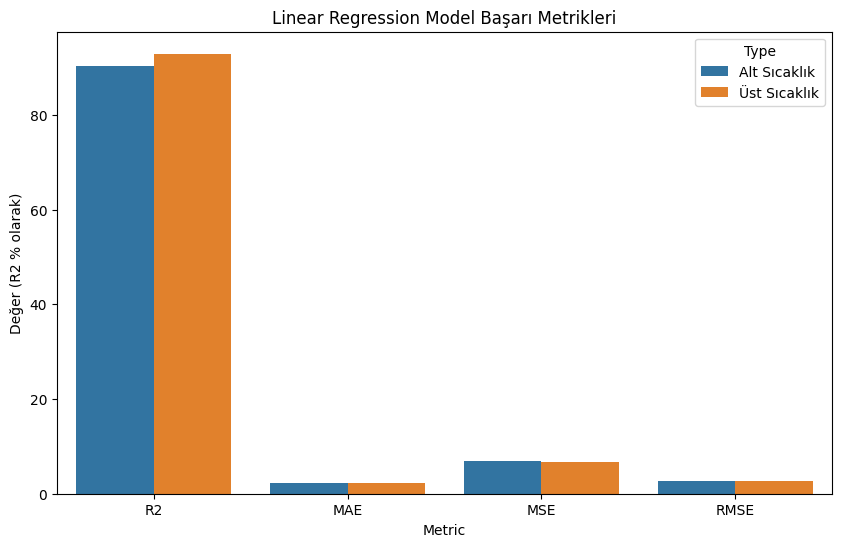

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_regression_metrics(metrics):
    # DataFrame oluştur
    df_metrics = pd.DataFrame({
        "Metric": ["R2", "MAE", "MSE", "RMSE"] * 2,
        "Value": [
            metrics["R2_ALT"] * 100,  # % olarak göstermek için 100 ile çarpıyoruz
            metrics["MAE_ALT"],
            metrics["MSE_ALT"],
            metrics["RMSE_ALT"],
            metrics["R2_UST"] * 100,
            metrics["MAE_UST"],
            metrics["MSE_UST"],
            metrics["RMSE_UST"],
        ],
        "Type": ["Alt Sıcaklık"] * 4 + ["Üst Sıcaklık"] * 4
    })

    plt.figure(figsize=(10, 6))
    sns.barplot(data=df_metrics, x="Metric", y="Value", hue="Type")

    plt.title("Linear Regression Model Başarı Metrikleri")
    plt.ylabel("Değer (R2 % olarak)")
    plt.ylim(bottom=0)  # Y eksenini 0'dan başlat

    plt.show()



plot_regression_metrics(metrics)


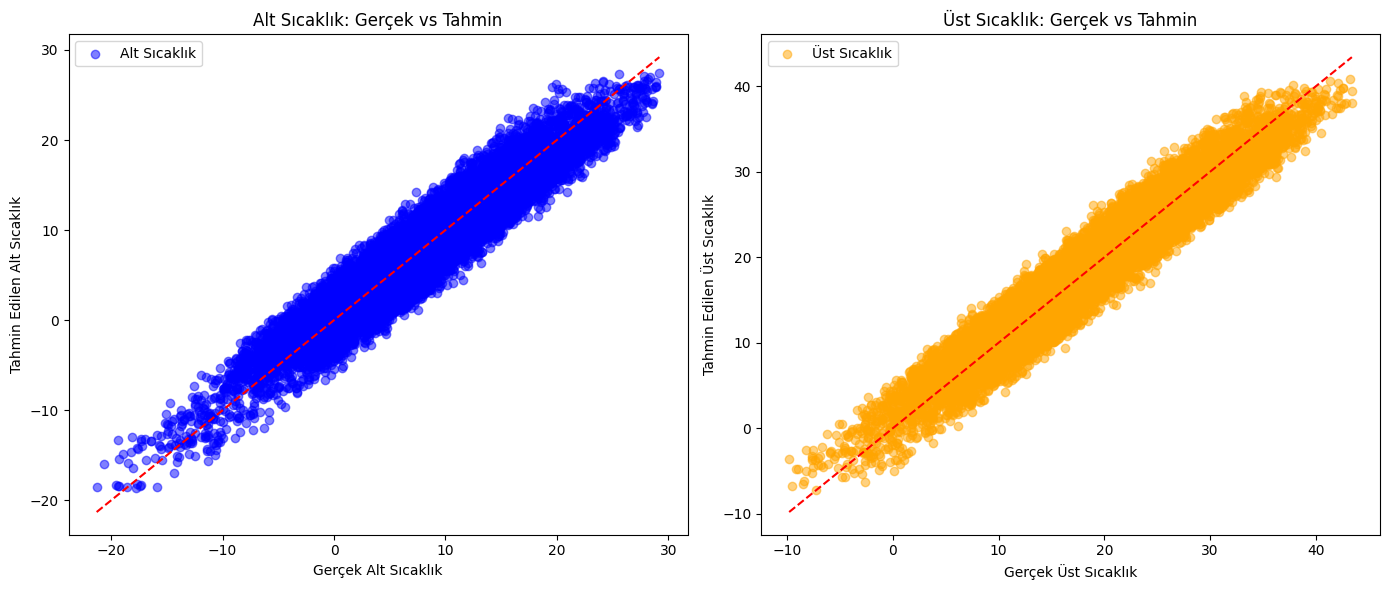

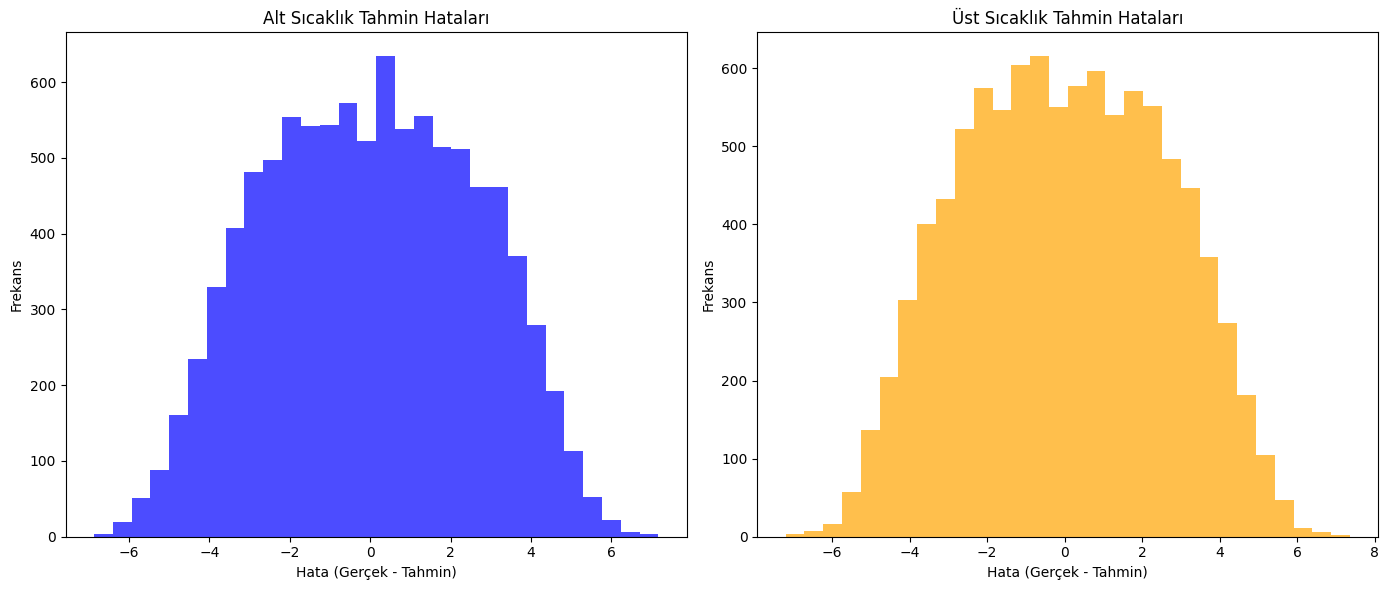

In [25]:
import matplotlib.pyplot as plt

# Gerçek ve tahmin değerleri zaten y_alt_all, y_alt_pred_all, y_ust_all, y_ust_pred_all olarak
# elimizde olsun (önceki koddan topladığımız şekilde)

# Scatter Plot: Gerçek vs Tahmin
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_alt_all, y_alt_pred_all, alpha=0.5, color='blue', label="Alt Sıcaklık")
plt.plot([y_alt_all.min(), y_alt_all.max()], [y_alt_all.min(), y_alt_all.max()], 'r--')  # 45° çizgi
plt.xlabel("Gerçek Alt Sıcaklık")
plt.ylabel("Tahmin Edilen Alt Sıcaklık")
plt.title("Alt Sıcaklık: Gerçek vs Tahmin")
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_ust_all, y_ust_pred_all, alpha=0.5, color='orange', label="Üst Sıcaklık")
plt.plot([y_ust_all.min(), y_ust_all.max()], [y_ust_all.min(), y_ust_all.max()], 'r--')
plt.xlabel("Gerçek Üst Sıcaklık")
plt.ylabel("Tahmin Edilen Üst Sıcaklık")
plt.title("Üst Sıcaklık: Gerçek vs Tahmin")
plt.legend()

plt.tight_layout()
plt.show()


# Hata Histogramları
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
hatalar_alt = y_alt_all - y_alt_pred_all
plt.hist(hatalar_alt, bins=30, color='blue', alpha=0.7)
plt.title("Alt Sıcaklık Tahmin Hataları")
plt.xlabel("Hata (Gerçek - Tahmin)")
plt.ylabel("Frekans")

plt.subplot(1, 2, 2)
hatalar_ust = y_ust_all - y_ust_pred_all
plt.hist(hatalar_ust, bins=30, color='orange', alpha=0.7)
plt.title("Üst Sıcaklık Tahmin Hataları")
plt.xlabel("Hata (Gerçek - Tahmin)")
plt.ylabel("Frekans")

plt.tight_layout()
plt.show()


In [26]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from iller import iller

# Ay isimleri ve gün sayıları
aylar = {
    'OCAK': 1, 'SUBAT': 2, 'MART': 3, 'NISAN': 4, 'MAYIS': 5, 'HAZIRAN': 6,
    'TEMMUZ': 7, 'AGUSTOS': 8, 'EYLUL': 9, 'EKIM': 10, 'KASIM': 11, 'ARALIK': 12
}
gun_sayisi = {
    1: 31, 2: 28, 3: 31, 4: 30, 5: 31, 6: 30,
    7: 31, 8: 31, 9: 30, 10: 31, 11: 30, 12: 31
}

def hesapla_tahminler(ay1, ay2, gun_fark, baslangic_tarihi):
    ust_fark = ay2['UST_SICAKLIK'] - ay1['UST_SICAKLIK']
    alt_fark = ay2['ALT_SICAKLIK'] - ay1['ALT_SICAKLIK']

    ust_gunluk_fark = ust_fark / gun_fark
    alt_gunluk_fark = alt_fark / gun_fark

    tahminler = []
    for g in range(gun_fark):
        tarih = baslangic_tarihi + timedelta(days=g)
        gun_ust = round(ay1['UST_SICAKLIK'] + ust_gunluk_fark * g, 2)
        gun_alt = round(ay1['ALT_SICAKLIK'] + alt_gunluk_fark * g, 2)
        tahminler.append([tarih.strftime('%Y-%m-%d'), gun_ust, gun_alt])
    
    return tahminler

# Tahminleri topla
tum_tahminler = []

for sehir_id, il in enumerate(iller, 1):
    df = pd.DataFrame({
        'AY': il['AY'],
        'UST_SICAKLIK': il['UST_SICAKLIK'],
        'ALT_SICAKLIK': il['ALT_SICAKLIK']
    })
    df['AY_NUMARASI'] = df['AY'].map(aylar)

    baslangic_tarihi = datetime(2026, 1, 1)
    tahminler = []

    for i in range(11):  # OCAK - KASIM arası
        ay1, ay2 = df.iloc[i], df.iloc[i + 1]
        gun_fark = gun_sayisi[ay2['AY_NUMARASI']]
        tahminler.extend(hesapla_tahminler(ay1, ay2, gun_fark, baslangic_tarihi))
        baslangic_tarihi += timedelta(days=gun_fark)

    # ARALIK - OCAK geçişi
    ay1 = df[df['AY'] == 'ARALIK'].iloc[0]
    ay2 = df[df['AY'] == 'OCAK'].iloc[0]
    gun_fark = gun_sayisi[1]
    tahminler.extend(hesapla_tahminler(ay1, ay2, gun_fark, baslangic_tarihi))

    # Her tahmine SEHIR_ID ekle
    for tahmin in tahminler:
        tum_tahminler.append({
            "SEHIR_ID": sehir_id,
            "TARIH": tahmin[0],
            "TAHMIN_ALT_SICAKLIK": tahmin[2],
            "TAHMIN_UST_SICAKLIK": tahmin[1]
        })

# DataFrame oluştur ve sütun sırasını düzenle
df_tahmin = pd.DataFrame(tum_tahminler, columns=["SEHIR_ID", "TARIH", "TAHMIN_ALT_SICAKLIK", "TAHMIN_UST_SICAKLIK"])

# Excel'e yaz
df_tahmin.to_excel("sehir_gunluk_sicaklik_2026.xlsx", index=False)

print("Günlük tahminler başarıyla oluşturuldu: sehir_gunluk_sicaklik_2026.xlsx")


Günlük tahminler başarıyla oluşturuldu: sehir_gunluk_sicaklik_2026.xlsx


In [27]:
import pandas as pd
import cx_Oracle
from datetime import datetime

# Excel dosyasını oku
excel_dosyasi = "sehir_gunluk_sicaklik_2026.xlsx"
df = pd.read_excel(excel_dosyasi)

# Oracle bağlantı bilgileri
oracle_username = "ECOBLOOM"
oracle_password = "ecobloom123."
oracle_dsn = "localhost:1521/XEPDB1"

conn = None
cursor = None

try:
    # Oracle bağlantısını aç
    conn = cx_Oracle.connect(oracle_username, oracle_password, oracle_dsn)
    cursor = conn.cursor()

    # INSERT sorgusu
    insert_query = """
    INSERT INTO SEHIR_HAVA_DURUMU (SEHIR_ID, TARIH, TAHMIN_ALT_SICAKLIK, TAHMIN_UST_SICAKLIK)
    VALUES (:1, :2, :3, :4)
    """

    # Veri tipini uygun hale getir (datetime dönüşümü)
    df['TARIH'] = pd.to_datetime(df['TARIH'])

    # Her satırı veritabanına kaydet
    for _, row in df.iterrows():
        cursor.execute(insert_query, (
            int(row['SEHIR_ID']),
            row['TARIH'],
            float(row['TAHMIN_ALT_SICAKLIK']),
            float(row['TAHMIN_UST_SICAKLIK'])
        ))

    # Değişiklikleri kaydet
    conn.commit()
    print("Excel dosyasındaki veriler başarıyla Oracle veritabanına kaydedildi.")

except cx_Oracle.DatabaseError as e:
    print("Veritabanı Hatası:", e)

finally:
    if cursor:
        cursor.close()
    if conn:
        conn.close()


Excel dosyasındaki veriler başarıyla Oracle veritabanına kaydedildi.


In [29]:
import cx_Oracle
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from iller import iller 

# Ay ve gün bilgileri
aylar = {
    'OCAK': 1, 'SUBAT': 2, 'MART': 3, 'NISAN': 4, 'MAYIS': 5, 'HAZIRAN': 6,
    'TEMMUZ': 7, 'AGUSTOS': 8, 'EYLUL': 9, 'EKIM': 10, 'KASIM': 11, 'ARALIK': 12
}
gun_sayisi = {1: 31, 2: 28, 3: 31, 4: 30, 5: 31, 6: 30, 7: 31, 8: 31, 9: 30, 10: 31, 11: 30, 12: 31}

# Tahmin hesaplama fonksiyonu
def hesapla_tahminler(ay1, ay2, gun_fark, baslangic_tarihi):
    ust_fark = ay2['UST_SICAKLIK'] - ay1['UST_SICAKLIK']
    alt_fark = ay2['ALT_SICAKLIK'] - ay1['ALT_SICAKLIK']
    
    ust_gunluk_fark = ust_fark / gun_fark
    alt_gunluk_fark = alt_fark / gun_fark
    
    tahminler = []
    for g in range(gun_fark):
        tarih = baslangic_tarihi + timedelta(days=g)
        gun_ust_tahmin = round(ay1['UST_SICAKLIK'] + ust_gunluk_fark * g, 2)
        gun_alt_tahmin = round(ay1['ALT_SICAKLIK'] + alt_gunluk_fark * g, 2)
        tahminler.append([tarih.strftime('%Y-%m-%d'), gun_ust_tahmin, gun_alt_tahmin])
    
    return tahminler

# Oracle bağlantı bilgileri
oracle_username = "ECOBLOOM"
oracle_password = "ecobloom123."
oracle_dsn = "localhost:1521/XEPDB1"

conn = None
cursor = None

try:
    conn = cx_Oracle.connect(oracle_username, oracle_password, oracle_dsn)
    cursor = conn.cursor()

    for sehir_id, il_data in enumerate(iller, 1):
        df = pd.DataFrame({
            'KONUM': il_data['KONUM'],
            'AY': il_data['AY'],
            'UST_SICAKLIK': il_data['UST_SICAKLIK'],
            'ALT_SICAKLIK': il_data['ALT_SICAKLIK']
        })
        df['AY_NUMARASI'] = df['AY'].map(aylar)

        tahminler = []
        baslangic_tarihi = datetime(2026, 1, 1)

        for i in range(len(df) - 1):
            ay1, ay2 = df.iloc[i], df.iloc[i + 1]
            gun_fark = gun_sayisi[ay2['AY_NUMARASI']]
            tahminler.extend(hesapla_tahminler(ay1, ay2, gun_fark, baslangic_tarihi))
            baslangic_tarihi += timedelta(days=gun_fark)

        # Aralık - Ocak bağlantısı
        aralik_ay = df[df['AY'] == 'ARALIK'].iloc[0]
        ocak_ay = df[df['AY'] == 'OCAK'].iloc[0]
        gun_fark_aralik_ocak = gun_sayisi[ocak_ay['AY_NUMARASI']]
        tahminler.extend(hesapla_tahminler(aralik_ay, ocak_ay, gun_fark_aralik_ocak, baslangic_tarihi))

        # Tahmin verisini DataFrame'e dök
        tahmin_df = pd.DataFrame(tahminler, columns=['Tarih', 'TAHMIN_UST_SICAKLIK', 'TAHMIN_ALT_SICAKLIK'])

        # Veritabanına insert işlemi
        insert_query = """
        INSERT INTO SEHIR_HAVA_DURUMU (TARIH, TAHMIN_ALT_SICAKLIK, TAHMIN_UST_SICAKLIK, SEHIR_ID)
        VALUES (TO_DATE(:1, 'YYYY-MM-DD'), :2, :3, :4)
        """

        for _, row in tahmin_df.iterrows():
            cursor.execute(insert_query, (row['Tarih'], row['TAHMIN_ALT_SICAKLIK'], row['TAHMIN_UST_SICAKLIK'], sehir_id))

        conn.commit()
        print(f"{il_data['KONUM'][0]} verileri başarıyla Oracle veritabanına kaydedildi.")

except cx_Oracle.DatabaseError as e:
    print("Veritabanı Hatası:", e)

finally:
    if cursor:
        cursor.close()
    if conn:
        conn.close()


ADANA verileri başarıyla Oracle veritabanına kaydedildi.
ADIYAMAN verileri başarıyla Oracle veritabanına kaydedildi.
AFYONKARAHISAR verileri başarıyla Oracle veritabanına kaydedildi.
AGRI verileri başarıyla Oracle veritabanına kaydedildi.
AMASYA verileri başarıyla Oracle veritabanına kaydedildi.
ANKARA verileri başarıyla Oracle veritabanına kaydedildi.
ANTALYA verileri başarıyla Oracle veritabanına kaydedildi.
ARTVIN verileri başarıyla Oracle veritabanına kaydedildi.
AYDIN verileri başarıyla Oracle veritabanına kaydedildi.
BALIKESIR verileri başarıyla Oracle veritabanına kaydedildi.
BILECIK verileri başarıyla Oracle veritabanına kaydedildi.
BINGOL verileri başarıyla Oracle veritabanına kaydedildi.
BITLIS verileri başarıyla Oracle veritabanına kaydedildi.
BOLU verileri başarıyla Oracle veritabanına kaydedildi.
BURDUR verileri başarıyla Oracle veritabanına kaydedildi.
BURSA verileri başarıyla Oracle veritabanına kaydedildi.
CANAKKALE verileri başarıyla Oracle veritabanına kaydedildi.
CAN